

# 데이터 전처리

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/프로젝트 1/MBA.csv')

In [ ]:
df.isna().sum()

,0
application_id,0
gender,0
international,0
gpa,0
major,0
race,1842
gmat,0
work_exp,0
work_industry,0
admission,5194


In [ ]:
# numeric_cols = df.select_dtypes(include=['float64', 'int64'])
# for element in numeric_cols:
#     sns.boxplot(data=df[element])
#     plt.title(element)
#     plt.show()

In [4]:
# 'race' 컬럼에서 결측치를 'unknown'으로 채움
df['race'] = df['race'].fillna('unknown')

# 'admission' 컬럼에서 결측치를 'denied'로 채움
df['admission'] = df['admission'].fillna('denied')

# 'admission' 컬럼에서 'Waitlist' 값을 'denied'로 변환
df['admission'] = df['admission'].apply(lambda x : 'denied' if x == 'Waitlist' else x)

# 'admission' 컬럼을 이진 변수로 변환 ('denied' = 1, 그 외 = 0)
df['admission'] = df['admission'].apply(lambda x : 1 if x == 'denied' else 0)

# 'application_id' 컬럼은 필요 없으므로 제거
df = df.drop('application_id', axis = 1)

# 'gender' 컬럼을 이진 변수로 변환 ('Male' = 0, 'Female' = 1)
df['gender'] = df['gender'].apply(lambda x : 0 if x == 'Male' else 1)

# 'international' 컬럼을 이진 변수로 변환 (True = 0, False = 1)
df['international'] = df['international'].apply(lambda x : 0 if x == True else 1)

# LabelEncoder 객체 생성
le = LabelEncoder()

# 범주형 컬럼(object 타입)을 모두 찾아서 레이블 인코딩 수행
categorical_cols = df.select_dtypes(include=['object']).columns

# 각 범주형 컬럼에 Label Encoding 적용
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])  # 인코딩 적용
    print(f"Classes (범주) for {col}: {le.classes_}")  # 원래 범주들 출력
    encoded_data = df[col]  # 인코딩된 값을 데이터프레임에 저장
    mapping = dict(zip(le.classes_, range(len(le.classes_))))  # 범주와 인코딩 값 매핑
    print(f"Mapping (범주 -> 인코딩 값) for {col}: {mapping}\n")

# X에 'admission'을 제외한 모든 특성 데이터를 저장
X = df.drop(['admission'], axis=1)

# y에 'admission' 컬럼을 저장 (타겟 변수)
y = df['admission']


Classes (범주) for major: ['Business' 'Humanities' 'STEM']
Mapping (범주 -> 인코딩 값) for major: {'Business': 0, 'Humanities': 1, 'STEM': 2}

Classes (범주) for race: ['Asian' 'Black' 'Hispanic' 'Other' 'White' 'unknown']
Mapping (범주 -> 인코딩 값) for race: {'Asian': 0, 'Black': 1, 'Hispanic': 2, 'Other': 3, 'White': 4, 'unknown': 5}

Classes (범주) for work_industry: ['CPG' 'Consulting' 'Energy' 'Financial Services' 'Health Care'
 'Investment Banking' 'Investment Management' 'Media/Entertainment'
 'Nonprofit/Gov' 'Other' 'PE/VC' 'Real Estate' 'Retail' 'Technology']
Mapping (범주 -> 인코딩 값) for work_industry: {'CPG': 0, 'Consulting': 1, 'Energy': 2, 'Financial Services': 3, 'Health Care': 4, 'Investment Banking': 5, 'Investment Management': 6, 'Media/Entertainment': 7, 'Nonprofit/Gov': 8, 'Other': 9, 'PE/VC': 10, 'Real Estate': 11, 'Retail': 12, 'Technology': 13}



<ipython-input-7-134871ea8f24>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Admission', y='Count', data=admission_counts, palette='Blues')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


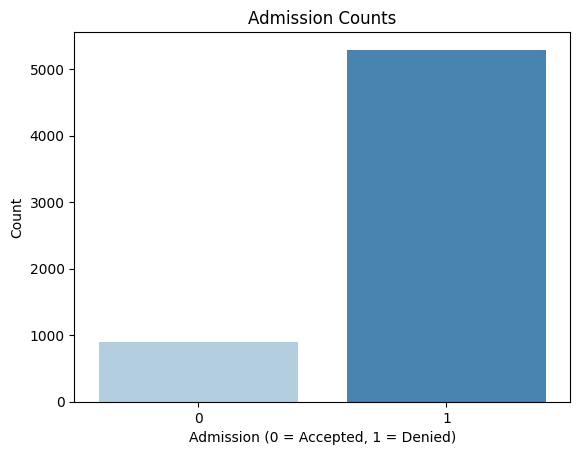

In [7]:
admission_counts = df['admission'].value_counts().reset_index()

# 컬럼 이름 변경
admission_counts.columns = ['Admission', 'Count']

# 바 플롯 그리기
sns.barplot(x='Admission', y='Count', data=admission_counts, palette='Blues')

# 제목과 축 레이블 설정
plt.title('Admission Counts')
plt.xlabel('Admission (0 = Accepted, 1 = Denied)')
plt.ylabel('Count')

# 플롯 표시
plt.show()

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")
y_probs = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC-AUC: {roc_auc:.2f}")

Accuracy: 84.26%
Recall: 0.98
Precision: 0.85
F1 Score: 0.91
ROC-AUC: 0.83
